# Il me faut…

* les célibataires
* mais aussi les totaux de la population, sinon je ne peux pas avoir la proportion!

In [1]:
import pandas as pd

In [10]:
df_total = pd.read_csv('population-simple.csv', sep=';')

In [15]:
df = pd.read_csv('population-simple-ages.csv', sep=';')
print(df.shape)
df = df.merge(df_total, copy=False)
print(df.shape)

(104, 53)
(104, 54)


In [16]:
df.head()

,Année,Canton,Type de population,Sexe,Etat civil,18 ans,19 ans,20 ans,21 ans,22 ans,...,57 ans,58 ans,59 ans,60 ans,61 ans,62 ans,63 ans,64 ans,65 ans,Population résidante permanente et non permanente
0,2014,Zürich,Population résidante permanente,Homme,Etat civil - Total,7122,7215,7198,7484,7951,...,8914,8661,8068,7834,7337,7460,6932,7202,6657,717702
1,2014,Zürich,Population résidante permanente,Homme,Célibataire,7119,7201,7148,7339,7671,...,1265,1184,1018,958,844,885,815,745,695,347287
2,2014,Zürich,Population résidante permanente,Femme,Etat civil - Total,6680,6680,6890,7131,7532,...,8838,8550,8392,8058,7879,7937,7513,7511,7488,728652
3,2014,Zürich,Population résidante permanente,Femme,Célibataire,6640,6558,6595,6610,6693,...,1156,1042,1001,952,867,895,842,742,699,306428
4,2014,Bern / Berne,Population résidante permanente,Homme,Etat civil - Total,5447,5447,5535,5767,5943,...,6859,6983,6595,6213,6172,6125,5862,6026,5830,494008


In [20]:
df.head()

,Année,Canton,Type de population,Sexe,Etat civil,18 ans,19 ans,20 ans,21 ans,22 ans,...,57 ans,58 ans,59 ans,60 ans,61 ans,62 ans,63 ans,64 ans,65 ans,Population résidante permanente et non permanente
0,2014,Zürich,Population résidante permanente,Homme,Etat civil - Total,7122,7215,7198,7484,7951,...,8914,8661,8068,7834,7337,7460,6932,7202,6657,717702
1,2014,Zürich,Population résidante permanente,Homme,Célibataire,7119,7201,7148,7339,7671,...,1265,1184,1018,958,844,885,815,745,695,347287
2,2014,Zürich,Population résidante permanente,Femme,Etat civil - Total,6680,6680,6890,7131,7532,...,8838,8550,8392,8058,7879,7937,7513,7511,7488,728652
3,2014,Zürich,Population résidante permanente,Femme,Célibataire,6640,6558,6595,6610,6693,...,1156,1042,1001,952,867,895,842,742,699,306428
4,2014,Bern / Berne,Population résidante permanente,Homme,Etat civil - Total,5447,5447,5535,5767,5943,...,6859,6983,6595,6213,6172,6125,5862,6026,5830,494008


In [4]:
df_cantons = df.groupby('Canton')

In [45]:
year_columns = ["{} ans".format(i) for i in range(18, 66)]

i = 0

def get_value(row):
    try:
        return row[['18 ans', '19 ans', '20 ans', '21 ans', '22 ans', '23 ans', '24 ans', '25 ans', '26 ans', '27 ans', '28 ans', '29 ans', '30 ans', '31 ans', '32 ans', '33 ans', '34 ans', '35 ans', '36 ans', '37 ans', '38 ans', '39 ans', '40 ans', '41 ans', '42 ans', '43 ans', '44 ans', '45 ans', '46 ans', '47 ans', '48 ans', '49 ans', '50 ans', '51 ans', '52 ans', '53 ans', '54 ans', '55 ans', '56 ans', '57 ans', '58 ans', '59 ans', '60 ans', '61 ans', '62 ans', '63 ans', '64 ans', '65 ans']].values.tolist()
        #return row['Population résidante permanente et non permanente'].values[0]
    except:
        print('Error')

##def get_total_value(row):
#    try:
#        return row['Population résidante permanente et non permanente'].values[0]
#    except:
#        print('Error')
        
cantons_list = []

for name, canton in df_cantons:
    is_male = canton['Sexe'] == 'Homme'
    is_female = canton['Sexe'] == 'Femme'
    is_total = canton['Etat civil'] == 'Etat civil - Total'
    is_single = canton['Etat civil'] == 'Célibataire'
    
    
    total_men = canton[is_male & is_total]
    single_men = canton[is_male & is_single]
    total_women = canton[is_female & is_total]
    single_women = canton[is_female & is_single]
    
    
    single_men_count = get_value(single_men)[0]
    single_women_count = get_value(single_women)[0]

    single_men_total = sum(single_men_count)
    single_women_total = sum(single_women_count)


    single_unmatched_men = [x1 - x2 for (x1, x2) in zip(single_men_count, single_women_count)]
    single_unmatched_men_per_1000 = [round((1000*z) / (x1 + x2), 2) for (z, x1, x2) in zip(single_unmatched_men, single_men_count, single_women_count)]
    
    single_unmatched_men_total = single_men_total - single_women_total
    single_unmatched_men_total_per_1000 = round((1000*single_unmatched_men_total) / (single_men_total + single_women_total), 2)
    
#    print('Unm', single_unmatched_men, single_unmatched_men_per_1000)
        
#    cantons_list.append({"canton":name, 'single_men':single_men_count, 'single_women':single_women_count, 'unmatched':single_unmatched_men, 'unmatched_per_1000':single_unmatched_men_per_1000, 'single_men_total':single_men_total, 'single_women_total': single_women_total, 'single_unmatched_men_total':single_unmatched_men_total, 'single_unmatched_men_total_per_1000':single_unmatched_men_total_per_1000})
    cantons_list.append({"canton":name, 'unmatched':single_unmatched_men, 'unmatched_per_1000':single_unmatched_men_per_1000, 'unmatched_total':single_unmatched_men_total, 'unmatched_total_per_1000':single_unmatched_men_total_per_1000})    
    
    #display.display(singles_df)
    i += 1
    if i > 1:
        pass
        #break

In [46]:
df_singles = pd.DataFrame(cantons_list)

In [72]:
df_singles.index = df_singles['canton']
df_singles.tail()

,Single Men,Single Women,canton,Total,Unmatched_men,Unmatched men per 1000 singles
canton,,,,,,
Uri,8550,6802,Uri,15352,1748,113.861386
Valais / Wallis,74321,65717,Valais / Wallis,140038,8604,61.440466
Vaud,180303,164269,Vaud,344572,16034,46.533090
Zug,28018,24428,Zug,52446,3590,68.451359
Zürich,347287,306428,Zürich,653715,40859,62.502773


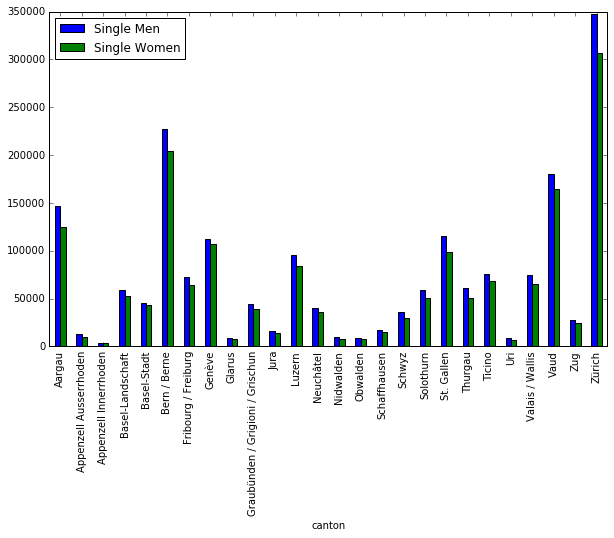

In [48]:
#df_singles = pd.DataFrame(cantons_list)
df_singles.plot(kind='bar', figsize=(10, 6))

In [49]:
df_singles['Total'] = df_singles['Single Men'] + df_singles['Single Women']
df_singles.head()

,Single Men,Single Women,canton,Total
canton,,,,
Aargau,146975,124939,Aargau,271914
Appenzell Ausserrhoden,12608,10276,Appenzell Ausserrhoden,22884
Appenzell Innerrhoden,4082,3232,Appenzell Innerrhoden,7314
Basel-Landschaft,59256,52684,Basel-Landschaft,111940
Basel-Stadt,45277,42805,Basel-Stadt,88082


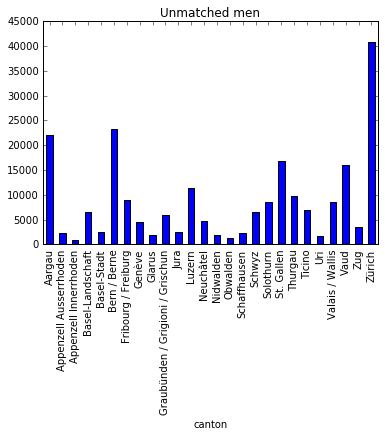

In [70]:
df_singles['Unmatched_men'] = df_singles['Single Men'] - df_singles['Single Women']
df_singles['Unmatched_men'].plot(kind='bar', title='Unmatched men')

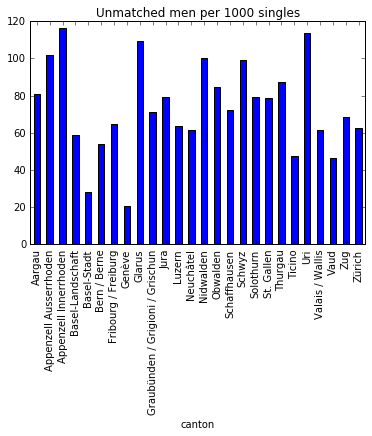

In [71]:
df_singles['Unmatched men per 1000 singles'] = df_singles['Unmatched_men'] / (df_singles['Total']/1000)
df_singles['Unmatched men per 1000 singles'].plot(kind='bar', title='Unmatched men per 1000 singles')

In [44]:
df_singles.to_csv('unmatched_per_age.csv')

In [47]:
df_singles.to_json('unmatched_global.json', orient='records')

In [41]:
print(*df_singles.columns, sep=', ')

canton, single_unmatched_men_total, single_unmatched_men_total_per_1000, unmatched, unmatched_per_1000
